In [1]:
import schillinger

In [2]:
#notes
from music21 import *
#from itertools import chain
%load_ext music21.ipython21

def convert2Dto1D(data):
    flat_array = []
    for d in data:
        if isinstance(d[0], list):
            for l in d:
                flat_array.append(l)
        else:
            flat_array.append(d)
    return flat_array
    

def showNotes(data):
    attacks = convert2Dto1D(data)
    #TS = str(int(len(clock))) +'/'+ str(int((clock[0].duration.quarterLength*16)))
    TS = '64/1'
    
    s = stream.Score(id='mainScore')
    
    for sequences in attacks:
        p0 = stream.Part(id='part0')
        p0.timeSignature = meter.TimeSignature(TS)
        tones = []
        for notes in sequences:
            
            nota = pitch.Pitch("C")
            nota.octave = 4
            nota = note.Note(nota.nameWithOctave)
            nota.duration.quarterLength = notes
            tones.append(nota)
            
        p0.append(tones)

        s.insert(0, p0)

    # stream2.show('text')
    # stream2.show('midi')
    return s

def showGroupedNotes(data, group):
    attacks = convert2Dto1D(data)
    #TS = str(int(len(clock))) +'/'+ str(int((clock[0].duration.quarterLength*16)))
    TS = str(group[1])+'/4'
    
    s = stream.Score(id='mainScore')
    
    for sequences in attacks:
        p0 = stream.Part(id='part0')
        p0.timeSignature = meter.TimeSignature(TS)
        tones = []
        for notes in sequences:
            
            nota = pitch.Pitch("C")
            nota.octave = 4
            nota = note.Note(nota.nameWithOctave)
            nota.duration.quarterLength = notes
            tones.append(nota)
            
        p0.append(tones)

        s.insert(0, p0)

    # stream2.show('text')
    # stream2.show('midi')
    return s

def showSplittedNotes(data,group,note_sequece):
    attacks = convert2Dto1D(data)
    #TS = str(int(len(clock))) +'/'+ str(int((clock[0].duration.quarterLength*16)))
    TS = str(group[1])+'/8'
    
    s = stream.Score(id='mainScore')
    
    for sequences in attacks:
        p0 = stream.Part(id='part0')
        p0.timeSignature = meter.TimeSignature(TS)
        tones = []
        note_counter = 0
        for notes in sequences:
            nota = pitch.Pitch(note_sequece[note_counter%len(note_sequece)])
            note_counter += 1
            nota.octave = 4
            nota = note.Note(nota.nameWithOctave)
            nota.duration.quarterLength = notes
            tones.append(nota)
            
        p0.append(tones)

        s.insert(0, p0)

    # stream2.show('text')
    # stream2.show('midi')
    return s

In [3]:
'''
all necessery generators:
3:2
4:3
5:2 5:3 5:4
6:5
7:2 7:3 7:4 7:5 7:6
8:3 8:5 8:7
9:2 9:4 9:5 9:7 9:8
''';

In [4]:
a = 3
b = 2
fraction = [a,b]

sr = schillinger.SchillingerRythm_I(fraction)
print(sr.common_product, sr.generators, sr.resultant)

sr_ = schillinger.SchillingerRythm_II(fraction)
print(sr_.common_product, sr_.major_generator, sr_.minor_generators, sr_.resultant)

[1, 1, 1, 1, 1, 1] [[3, 3], [2, 2, 2]] [2, 1, 1, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1] [3, 3, 3] [[2, 2, 2], [2, 2, 2]] [2, 1, 1, 1, 1, 1, 2]


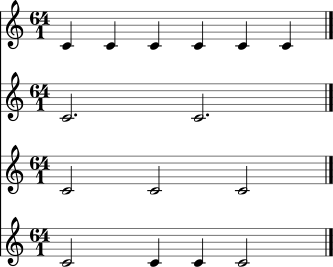

In [5]:
attack_list = [sr.common_product, sr.generators, sr.resultant]
s = showNotes(attack_list)
s.show()

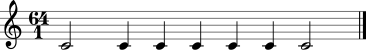

In [6]:
attack_list = [sr_.resultant]
s = showNotes(attack_list)
s.show()

In [8]:
group = schillinger.Grouping()
# type I grouping
print(group.type_I_grouping_by_ab(a,b))
print(group.type_I_grouping_by_a(a,b))
print(group.type_I_grouping_by_b(a,b))
# type II grouping
print(group.type_II_grouping_by_aa(a,b))
print(group.type_II_grouping_by_a(a,b))
print(group.type_II_grouping_by_b(a,b))
#Pair Grouping
group.grouping_by_pairs(sr.resultant,sr_.resultant,a,b)
print(group.balance)
print(group.expansion)
print(group.contraction)

[1, 6]
[2, 3]
[3, 2]
[1.0, 9]
[3.0, 3]
[4.5, 2]
[2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3]
[2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2]
[2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2]


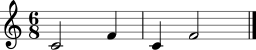

In [16]:
attack_list = [sr.resultant]
notes = ["C","F"]
s = showSplittedNotes(attack_list, group.type_I_grouping_by_ab(a,b),notes)
s.show()

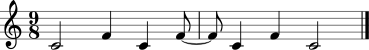

In [11]:
#resultants applied to instument forms (chapter7)
attack_list = [sr_.resultant]
notes = ["C","F"]
s = showSplittedNotes(attack_list, group.type_II_grouping_by_aa(a,b),notes)
s.show()